<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/HW3/HW3_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW 3: Multivariate Linear Regression**
---

###**1) Read in Data**
---

In [3]:
import pandas as pd
df = pd.read_csv("https://github.com/fedhere/PUS2024/blob/main/HW3/water_consumption.csv?raw=true", index_col=0)

In [4]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


In [5]:
# prompt: convert the first column of df to datetime

#df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])

In [6]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 21.0+ KB


###**2) Descriptive Statistics**
---

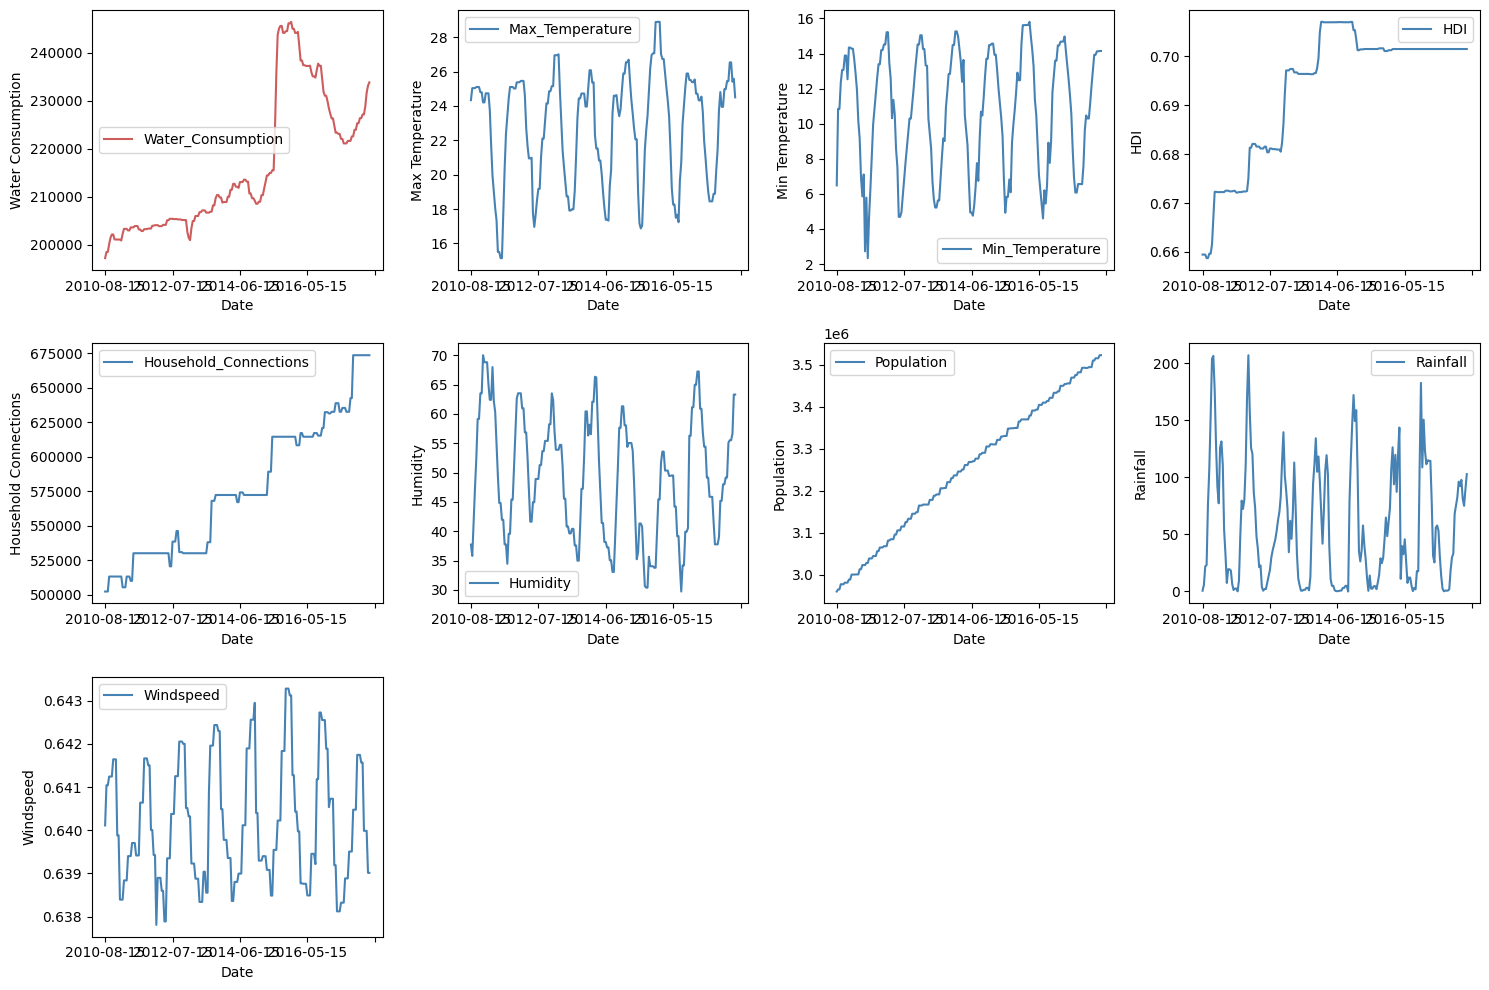

In [7]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

ax = plt.subplot(3, 4, 2)
df.plot('Date', 'Max_Temperature', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Max Temperature')

ax = plt.subplot(3, 4, 3)
df.plot('Date', 'Min_Temperature', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Min Temperature')

ax = plt.subplot(3, 4, 4)
df.plot('Date', 'HDI', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('HDI')

ax = plt.subplot(3, 4, 5)
df.plot('Date', 'Household_Connections', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Household Connections')

ax = plt.subplot(3, 4, 6)
df.plot('Date', 'Humidity', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Humidity')

ax = plt.subplot(3, 4, 7)
df.plot('Date', 'Population', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Population')

ax = plt.subplot(3, 4, 8)
df.plot('Date', 'Rainfall', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Rainfall')

ax = plt.subplot(3, 4, 9)
df.plot('Date', 'Windspeed', ax=ax, color='SteelBlue')
plt.xlabel('Date')
plt.ylabel('Windspeed')

plt.tight_layout()
plt.show()

####**Figure 2.1 [Subplots 1-9]: Displaying variables (1) Water Consumption, (2) Max Temperature, (3) Min Temperature, (4) HDI, (5) Household Connections, (6) Humidity, (7) Population, (8) Rainfall, and (9) Windspeed plotted against the date by year.**

In [8]:
df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281


In [9]:
#add a datetime object
df["date"] = pd.to_datetime(df.Date)
df["year"] = df["date"].dt.year

####**Histograms**

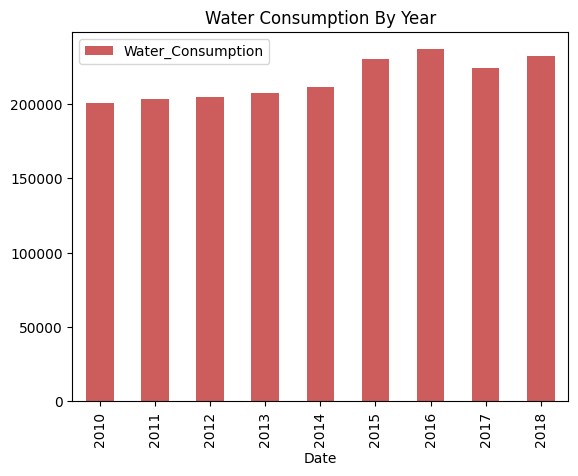

In [40]:
#water consumption
wc = df.drop(['Date', 'date', 'Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_wc = wc.groupby('year').mean()
ax = avg_wc.plot(kind="bar", color='IndianRed')

plt.title("Water Consumption By Year");
plt.xlabel("Date");

####**Figure 2.2: Water Consumption by Year, single peak in 2016 with increasing numbers in 2018.**

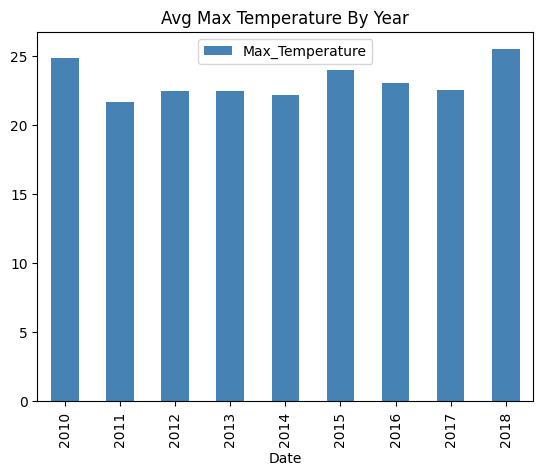

In [41]:
maxt = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_maxt = maxt.groupby('year').mean()
ax = avg_maxt.plot(kind="bar", color='SteelBlue')

plt.title("Avg Max Temperature By Year");
plt.xlabel("Date");

####**Figure 2.3: Max Temperature by Year, bimodal distribution with highest peaks in 2010 and 2018.**

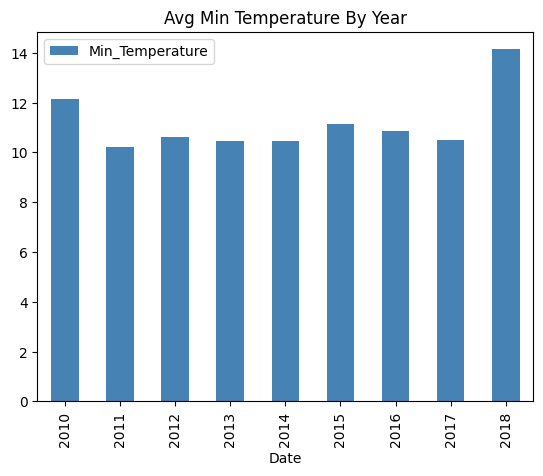

In [42]:
mint = df.drop(['Date', 'date', 'Water_Consumption', 'Max_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_mint = mint.groupby('year').mean()
ax = avg_mint.plot(kind="bar", color='SteelBlue')

plt.title("Avg Min Temperature By Year");
plt.xlabel("Date");

####**Figure 2.4: Minimum Temperature by Year, bimodal distribution with the larger peak in 2018 and smaller peak in 2010.**

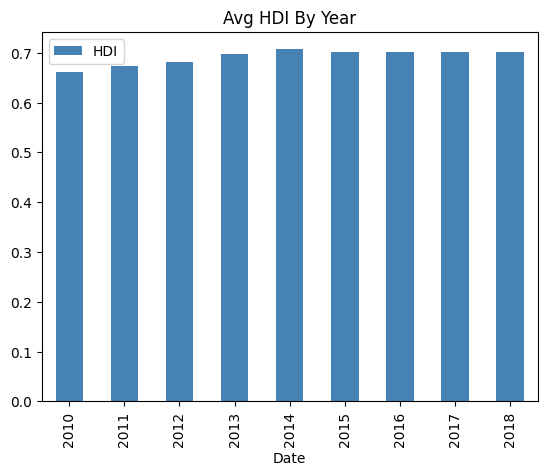

In [15]:
hdi = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'Max_Temperature', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_hdi = hdi.groupby('year').mean()
ax = avg_hdi.plot(kind="bar", color='SteelBlue')

plt.title("Avg HDI By Year");
plt.xlabel("Date");

####**Figure 2.5: HDI by year, nearly bell shaped with right-tail-skewing.**

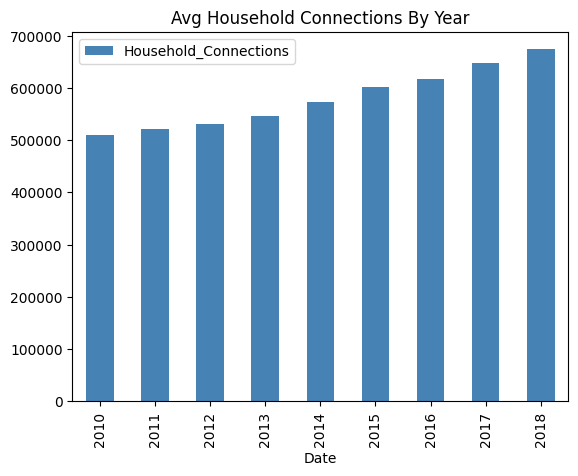

In [16]:
hc = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Max_Temperature', 'Humidity', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_hc = hc.groupby('year').mean()
ax = avg_hc.plot(kind="bar", color='SteelBlue')

plt.title("Avg Household Connections By Year");
plt.xlabel("Date");

####**Figure 2.6: Household Connections by Year, Positive Linear Distribution/Correlation**

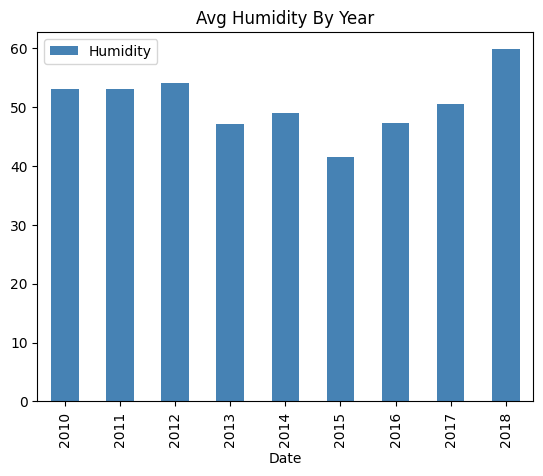

In [17]:
hum = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Household_Connections', 'Max_Temperature', 'Population', 'Rainfall', 'Windspeed'], axis=1)

avg_hum = hum.groupby('year').mean()
ax = avg_hum.plot(kind="bar", color='SteelBlue')

plt.title("Avg Humidity By Year");
plt.xlabel("Date");

####**Figure 2.7: Average Humidity by Year**

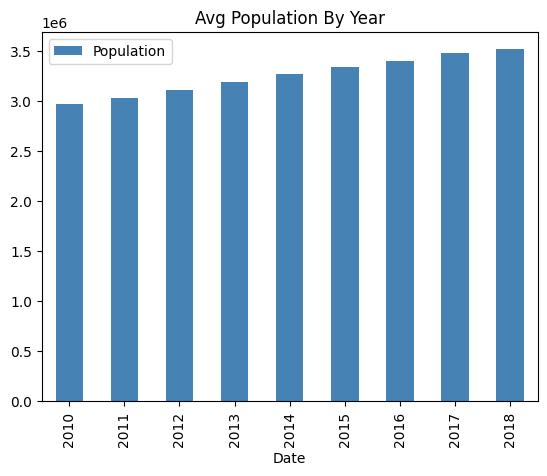

In [18]:
pop = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Max_Temperature', 'Rainfall', 'Windspeed'], axis=1)

avg_pop = pop.groupby('year').mean()
ax = avg_pop.plot(kind="bar", color='SteelBlue')

plt.title("Avg Population By Year");
plt.xlabel("Date");

####**Figure 2.8: Average Population by Year, Positive Linear Distribution/Correlation**

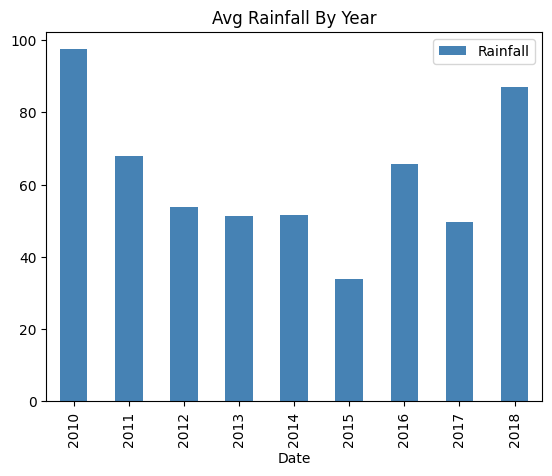

In [19]:
rf = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Max_Temperature', 'Windspeed'], axis=1)

avg_rf = rf.groupby('year').mean()
ax = avg_rf.plot(kind="bar", color='SteelBlue')

plt.title("Avg Rainfall By Year");
plt.xlabel("Date");

####**Figure 2.9: Average Rainfall by Year, bimodel distribution with larger peak at 2010 and smaller peak at 2018.**

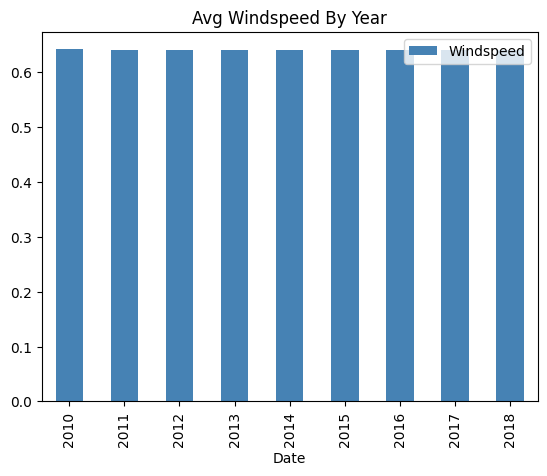

In [20]:
ws = df.drop(['Date', 'date', 'Water_Consumption', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Max_Temperature'], axis=1)

avg_ws = ws.groupby('year').mean()
ax = avg_ws.plot(kind="bar", color='SteelBlue')

plt.title("Avg Windspeed By Year");
plt.xlabel("Date");

####**Figure 2.10: Average Windspeed by Year**

###**3) Exploratory Data Analysis**
---

In [21]:
df_corr = df.iloc[:,1:].corr()
df_corr

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed,date,year
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267,0.100863,0.074017
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344,0.038326,0.035176
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970,0.812184,0.815610
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903,0.968636,0.953476
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201,0.799540,0.787092
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531,-0.188262,-0.157238
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513,0.998734,0.989362
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433,-0.082273,-0.107151
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000,0.042728,-0.049191
date,0.100863,0.038326,0.812184,0.968636,0.799540,-0.188262,0.998734,-0.082273,0.042728,1.000000,0.991032


####**Question: What is the maximum result one can get with unvariate linear regression?**

####The highest possible value for the Pearson's correlation coefficient is +1.0, which indicates a perfect positive correlation and $R^2$ $=$ $1$.


####Based on the model's correlation result and $R^2$, I predict that the highest correlation from the univariate linear regression test will be Household Connection due to its high Pearson coefficient in relation to Water Consumption.

###**3[Cont.]) Linear Regression**
---

###**3A) Univariate Model**

(197,)
(197,)


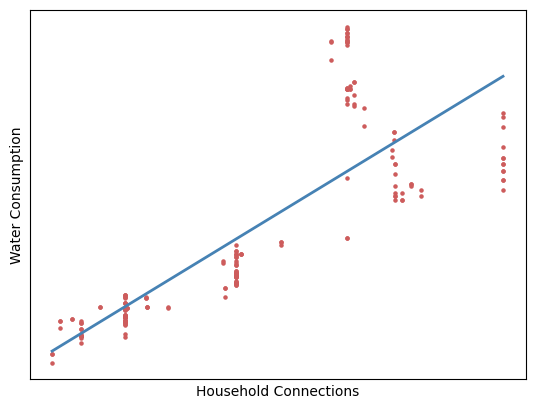

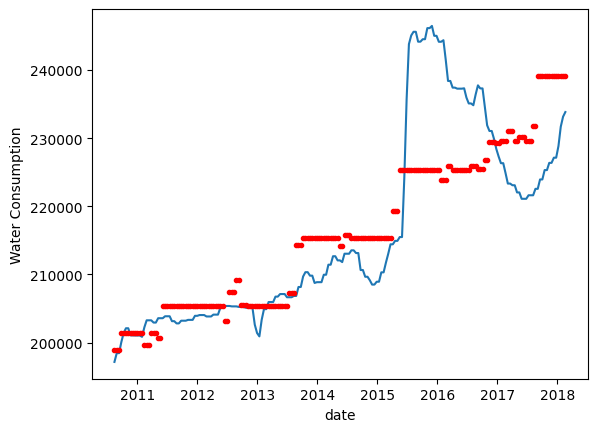

In [22]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
x = df['Household_Connections'].values;
y = df['Water_Consumption'].values;

#determines shape
print(np.shape(x));
print(np.shape(y));

#reshapes data
x = x.reshape(197, 1);
y = y.reshape(197, 1);

#creates regression object and calls fit
model_univariate = linear_model.LinearRegression();
model_univariate.fit(x, y);

prediction= model_univariate.predict(x);

plt.scatter(x, y, s=5, color='IndianRed')
plt.plot(x, model_univariate.predict(x), color='SteelBlue', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.xlabel('Household Connections');
plt.ylabel('Water Consumption');
plt.show()

plt.plot(df['date'], y);
plt.plot(df['date'], prediction, 'r.');
plt.xlabel('date');
plt.ylabel('Water Consumption');
plt.show()


####**Figure 3.1: Linear regression line depicting the best linear relationship between Water Consumption and Household Connections with data points plotted in red. The slope and intercept indicate a high correlation between the two variables.**

####**Figure 3.2: Water Consumption by Year with overlay of Household Connections predicted data points.**

###**3B) Multivariate Model with Statsmodel**
---

In [23]:

# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        01:59:50   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

####**$R^2$ represents the amount of variation in the other variables can be explained by the independent variable, Water Consumption. $P$ $>$ $|t|$ represents the p-value or the confidence interval of the coefficients.**

####**Assuming a significance threshold of 0.05, the variables with signficant p-values (below 0.05) are Max Temperature, Minimum Temperature, HDI, Household Connections, Humidity, and Population.**

###**3C) Training-test split**
---

####**3C-1)**
---

In [24]:
#data trimming function test
#df_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#df_trimmed

In [25]:
#put column labels in array
numerical_features = df.select_dtypes(include='number').columns.values

#create array of dataframe values
#num_trimmed = df[numerical_features]
#numerical_values = num_trimmed.values

####**3C-2) Standardize the Features**
---

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

In [27]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.07137969,
        -0.03718638, -1.75903202],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -0.97229672,
         0.63119909, -1.75903202],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -0.65827933,
         0.63119909, -1.75903202],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  0.36029122,
        -0.12687215,  1.87907095],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  0.6399626 ,
        -0.82569644,  1.87907095],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  0.89472364,
        -0.82569644,  1.87907095]])

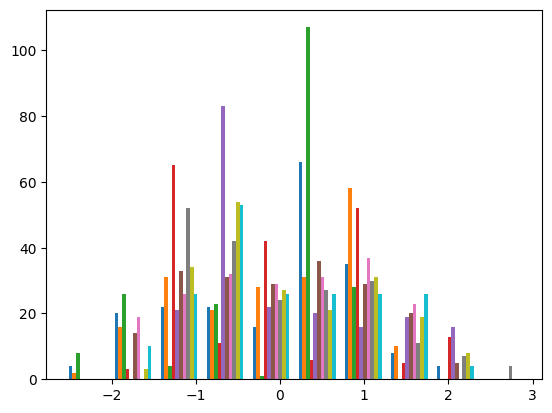

In [28]:
plt.hist(scaled_features)
plt.show()

In [29]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed,date,year
2010-08-15,2010-08-15,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186,2010-08-15,-1.759032
2010-08-29,2010-08-29,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199,2010-08-29,-1.759032
2010-09-12,2010-09-12,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199,2010-09-12,-1.759032
2010-09-26,2010-09-26,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965,2010-09-26,-1.759032
2010-10-10,2010-10-10,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965,2010-10-10,-1.759032
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872,2017-12-24,1.424308
2018-01-07,2018-01-07,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872,2018-01-07,1.879071
2018-01-21,2018-01-21,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872,2018-01-21,1.879071
2018-02-04,2018-02-04,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696,2018-02-04,1.879071


In [30]:
df_copy.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed,date,year
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,-5.770905e-16,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15,2014-05-18 00:00:00,4.688861e-15
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,-1.342012e+00,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00,2010-08-15 00:00:00,-1.759032e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,-8.495739e-01,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01,2012-07-01 00:00:00,-8.495063e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,-4.095261e-01,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01,2014-05-18 00:00:00,6.001947e-02
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,7.268914e-01,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01,2016-04-03 00:00:00,9.695452e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,2.155878e+00,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00,2018-02-18 00:00:00,1.879071e+00
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,NaN,1.002548e+00


####**3C-3) Train-test split to avoid overfitting**
---

In [31]:

# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
vars = numerical_features
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2)

####**3C-4)**
---

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = linear_model.LinearRegression();

# Fit the model to the training data
model_multivariate.fit(X1, y);

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test);

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model_multivariate.coef_)))
print("Intercept:", model_multivariate.intercept_)

Mean Squared Error: 3.1393813651478577e-30
R-squared: 1.0
Coefficients: [('Max_Temperature', 1.5957284930148598e-15), ('Min_Temperature', 6.938893903907228e-16), ('HDI', 7.901665433074356e-16), ('Household_Connections', 1.0928757898653885e-16), ('Water_Consumption', 0.9999999999999988), ('Humidity', -6.904199434387692e-16), ('Population', -7.797582024515748e-16), ('Rainfall', -1.4432899320127035e-15), ('Windspeed', -9.332812300755222e-16), ('year', -1.734723475976807e-17)]
Intercept: 9.860761315262648e-31


####**3C-5) Visualize the Model**
---

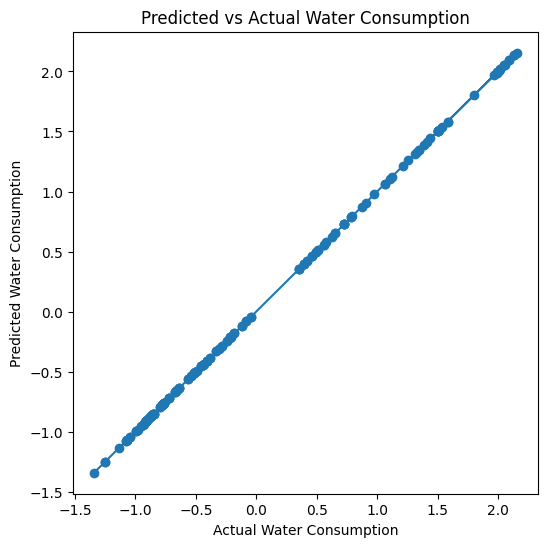

In [33]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()

####**Figure 3.1: Predicted vs Actual Water Consumption against the line of linear regression.**

Text(0, 0.5, 'Water Consumption')

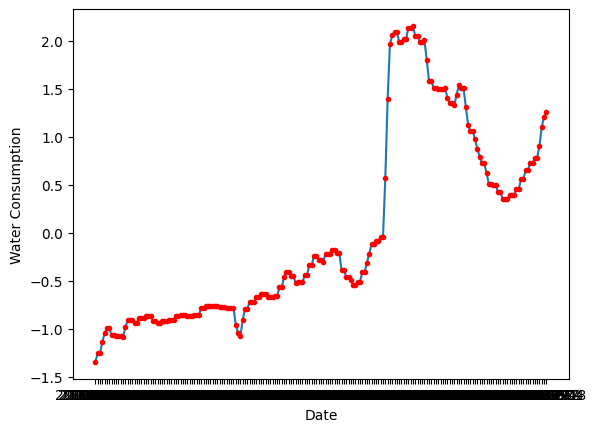

In [34]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

####**Figure 3.2: Predicted vs Actual Water Consumption against the date.**

###**3D)** Simplify The Model
---

###**3D-1)**
---

In [35]:
df_copy.iloc[:,1:].corr() > 0.5

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed,date,year
Max_Temperature,True,True,False,False,False,False,False,True,False,False,False
Min_Temperature,True,True,False,False,False,True,False,True,False,False,False
HDI,False,False,True,True,True,False,True,False,False,True,True
Household_Connections,False,False,True,True,True,False,True,False,False,True,True
Water_Consumption,False,False,True,True,True,False,True,False,False,True,True
Humidity,False,True,False,False,False,True,False,True,False,False,False
Population,False,False,True,True,True,False,True,False,False,True,True
Rainfall,True,True,False,False,False,True,False,True,False,False,False
Windspeed,False,False,False,False,False,False,False,False,True,False,False
date,False,False,True,True,True,False,True,False,False,True,True


In [36]:
#vars2_int = df_copy.astype(int)
#vars2_int_arr = np.array(vars2_int, dtype=int)

vars2 = ['HDI', 'Household_Connections', 'Population']


###**3D-2)**
---

In [37]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

# Create a Linear Regression model
model_multivariate = linear_model.LinearRegression();

# Fit the model to the training data
model_multivariate.fit(X2, y);

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test);

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars2, model_multivariate.coef_)))
print("Intercept:", model_multivariate.intercept_)

Mean Squared Error: 0.41460943821123414
R-squared: 0.6001201038054463
Coefficients: [('HDI', -0.04921118450813082), ('Household_Connections', 0.5907169532663942), ('Population', 0.26630553889101366)]
Intercept: -1.5342345703624225e-15


####**3D-3)**
---

Text(0, 0.5, 'Water Consumption')

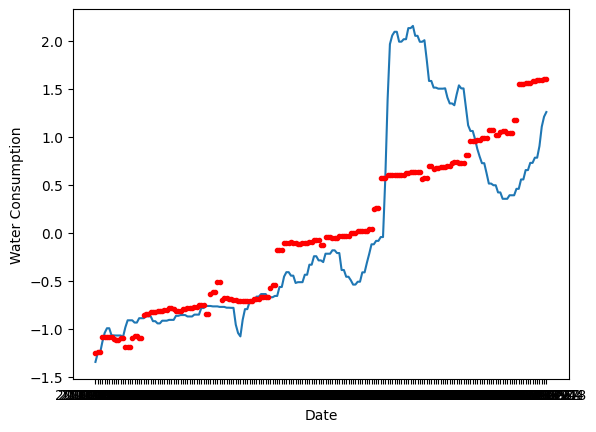

In [38]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

####**Figure 3.3: Predicted vs Actual Water Consumption against the date, multivariate model.**

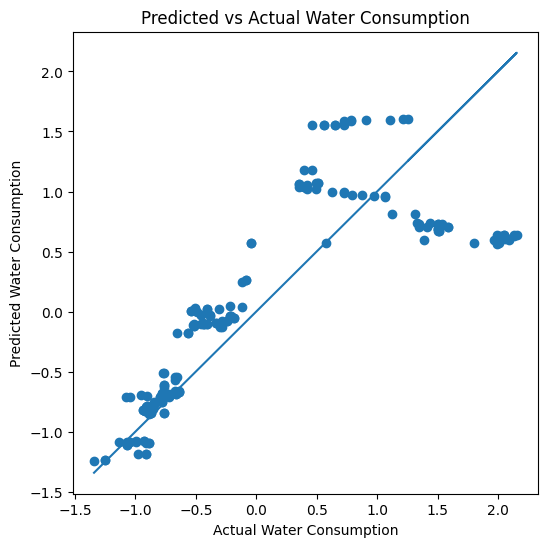

In [68]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
#plt.scatter(y, model_univariate.predict(y_test))
plt.scatter(y, model_multivariate.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()

####**Figure 3.4: Predicted vs Actual Water Consumption against the line of linear regression, multivariate model.**